<a href="https://colab.research.google.com/github/khan-habibullah/ml1/blob/master/Linear_reggres_advertis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip  /content/archive.zip -d destination.zip

Archive:  /content/archive.zip
  inflating: destination.zip/Dummy Data HSS.csv  


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
#Read the given CSV file, and view some sample records
advertising = pd.read_csv("/content/destination.zip/Dummy Data HSS.csv")
advertising.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [48]:
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [47]:
data=advertising.dropna()

In [46]:
advertising.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [20]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


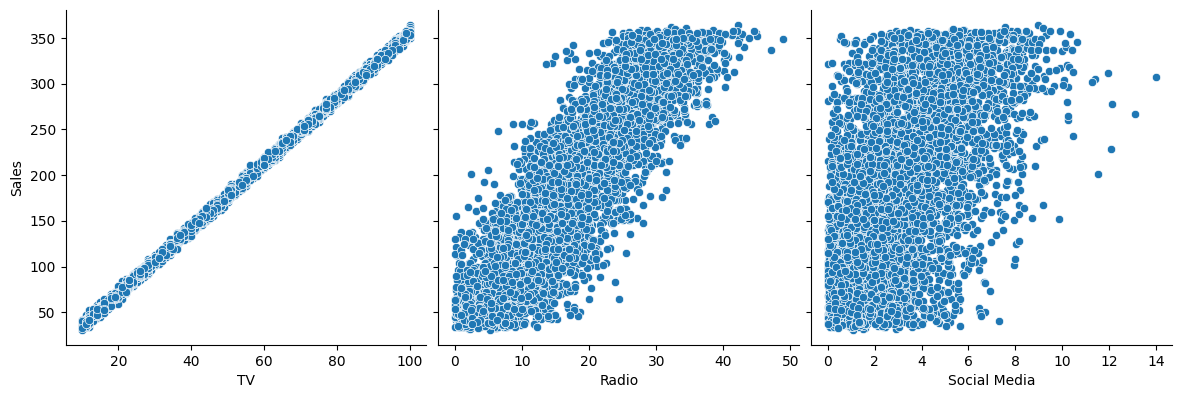

In [49]:
import seaborn as sns
sns.pairplot(data, x_vars=[ 'TV','Radio','Social Media' ], y_vars = 'Sales', size = 4, kind = 'scatter' )
plt.show()

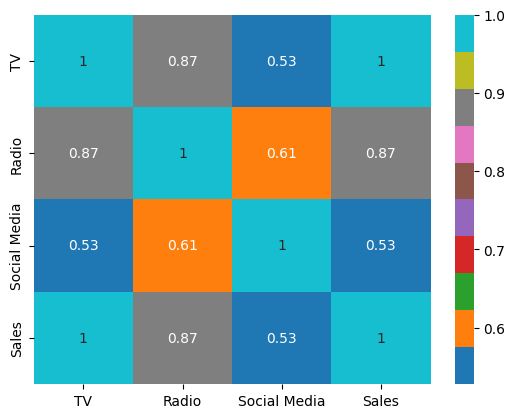

In [50]:
sns.heatmap( data.corr(), cmap = 'tab10', annot = True )
plt.show()

In [51]:
X = data[ 'TV' ]
y = data[ 'Sales' ]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [54]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(3182,)
(1364,)
(3182,)
(1364,)


In [55]:
import statsmodels.api as sm

In [56]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


In [57]:
# Fit the resgression line using 'OLS'
model= sm.OLS(y_train, X_train_sm).fit()
model.params

const   -0.111058
TV       3.560633
dtype: float64

In [58]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.282e+06
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:39:22   Log-Likelihood:                -7910.4
No. Observations:                3182   AIC:                         1.582e+04
Df Residuals:                    3180   BIC:                         1.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1111      0.119     -0.934      0.3

In [59]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = model.predict(X_test_sm)

In [60]:
y_pred.head()

2838    131.632351
379     185.041841
3289    291.860821
1933    277.618290
590     231.330066
dtype: float64

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from math import sqrt


rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse


3.0446600824697194

In [69]:
r2=r2_score( y_test, y_pred ) 
r2

0.9989028032794064